✅ Dataset Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32831 entries, 0 to 32830
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       32831 non-null  object 
 1   location_name                 32831 non-null  object 
 2   latitude                      32831 non-null  float64
 3   longitude                     32831 non-null  float64
 4   timezone                      32831 non-null  object 
 5   last_updated_epoch            32831 non-null  float64
 6   last_updated                  32831 non-null  object 
 7   temperature_celsius           32831 non-null  float64
 8   temperature_fahrenheit        32831 non-null  float64
 9   condition_text                32831 non-null  object 
 10  wind_mph                      32831 non-null  float64
 11  wind_kph                      32831 non-null  float64
 12  wind_degree                 

C:\Users\jsrv7\AppData\Local\Temp\ipykernel_13508\877845511.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\jsrv7\AppData\Local\Temp\ipykernel_13508\877845511.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


🚨 Found 37271 Extreme Weather Records!

                           latitude Parameter Extreme_Type  \
31843 1970-01-01 00:00:00.000000001  latitude         High   
30783 1970-01-01 00:00:00.000000001  latitude         High   
30124 1970-01-01 00:00:00.000000001  latitude         High   
31917 1970-01-01 00:00:00.000000001  latitude         High   
30199 1970-01-01 00:00:00.000000001  latitude         High   

                           latitude  longitude  last_updated_epoch  \
31843 1970-01-01 00:00:00.000000001   0.432397            0.972095   
30783 1970-01-01 00:00:00.000000001   0.432397            0.942132   
30124 1970-01-01 00:00:00.000000001   0.432397            0.924145   
31917 1970-01-01 00:00:00.000000001   0.432397            0.974071   
30199 1970-01-01 00:00:00.000000001   0.432397            0.926162   

       temperature_celsius  temperature_fahrenheit  wind_mph  wind_kph  ...  \
31843             0.488529                0.488006  0.002556  0.002568  ...   
30783   

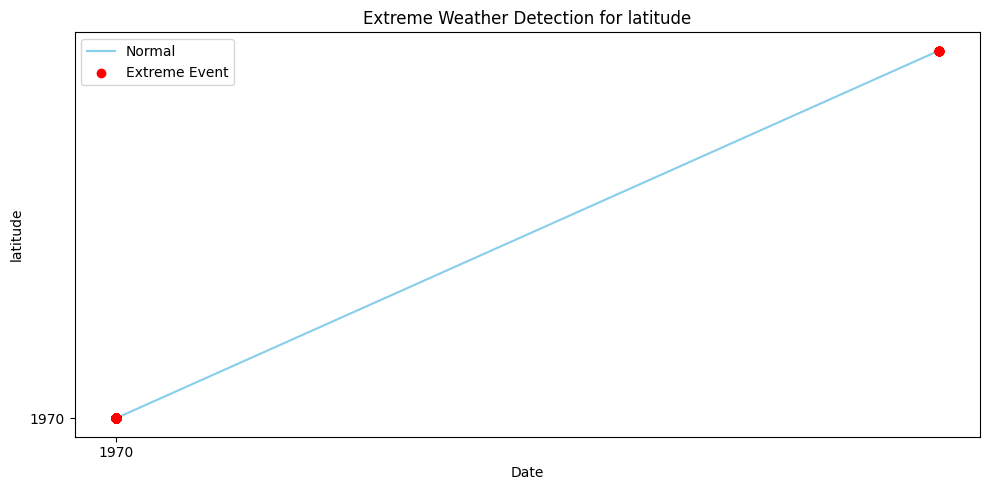


💾 Extreme weather events saved to 'extreme_weather_events.csv'
✅ Analysis Completed!


In [1]:





import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load Dataset
df = pd.read_csv("C:/Users/jsrv7/.vscode/cleaned_dataset.csv")
print("✅ Dataset Loaded Successfully!\n")
print(df.info(), "\n")

# 2️⃣ Detect Numeric Weather Columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns detected: {numeric_cols}\n")

# 3️⃣ Detect Date Column
date_col = None
for col in df.columns:
    try:
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
    except Exception:
        continue

if date_col:
    df = df.sort_values(by=date_col)
    print(f"📅 Date column detected: {date_col}\n")
else:
    print("⚠ No valid date column found!\n")

# 4️⃣ Define Extreme Weather Thresholds Automatically
extreme_events = pd.DataFrame()

for col in numeric_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    high_threshold = mean_val + 2 * std_val
    low_threshold = mean_val - 2 * std_val

    extreme_rows = df[(df[col] > high_threshold) | (df[col] < low_threshold)].copy()
    extreme_rows["Extreme_Type"] = np.where(extreme_rows[col] > high_threshold, "High", "Low")
    extreme_rows["Parameter"] = col
    extreme_events = pd.concat([extreme_events, extreme_rows])

if not extreme_events.empty:
    print(f"🚨 Found {len(extreme_events)} Extreme Weather Records!\n")
    print(extreme_events[[date_col, "Parameter", "Extreme_Type"] + numeric_cols].head())
else:
    print("✅ No extreme weather events detected.\n")

# 5️⃣ Visualize Extreme Events (for main weather parameter)
if len(numeric_cols) > 0:
    main_col = numeric_cols[0]
    plt.figure(figsize=(10, 5))
    plt.plot(df[date_col], df[main_col], label='Normal', color='skyblue')
    
    if not extreme_events.empty:
        plt.scatter(extreme_events[date_col], extreme_events[main_col], 
                    color='red', label='Extreme Event', zorder=5)
    
    plt.title(f"Extreme Weather Detection for {main_col}")
    plt.xlabel("Date")
    plt.ylabel(main_col)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6️⃣ Save results
extreme_events.to_csv("extreme_weather_events.csv", index=False)
print("\n💾 Extreme weather events saved to 'extreme_weather_events.csv'")
print("✅ Analysis Completed!")


